In [82]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
%matplotlib inline

In [6]:
df_user = pd.read_csv(r'datasets/3_user_data.csv', sep=',')
df_logs = pd.read_csv(r'datasets/3_logs.csv', sep=',')

In [7]:
df_logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [8]:
df_user.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [10]:
df_user.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [24]:
df_success = df_logs[['client']].value_counts().head(1)

In [25]:
print(type(df_success))

<class 'pandas.core.series.Series'>


In [30]:
d= int(df_success.index[0][0])

In [31]:
d

61468

In [36]:
df_logs[['platform', 'success']].value_counts().reset_index().sort_values(by='platform', ascending=False)

,platform,success,count
4,tablet,True,180
5,tablet,False,62
0,phone,True,2019
2,phone,False,734
1,computer,True,1090
3,computer,False,415


In [37]:
df_total = df_user.merge(df_logs,on='client')

In [92]:
df_total

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [50]:
df_date = df_total.query('premium == True').groupby('platform', as_index=False).client.count()

In [51]:
df_date

,platform,client
0,computer,150
1,phone,246
2,tablet,24


In [63]:
df_premium = df_total.query('premium == True').age.value_counts().reset_index()

In [66]:
df_premium

,age,count
0,25,17
1,57,15
2,35,14
3,64,13
4,59,12
5,27,11
6,61,11
7,29,11
8,52,11
9,49,11


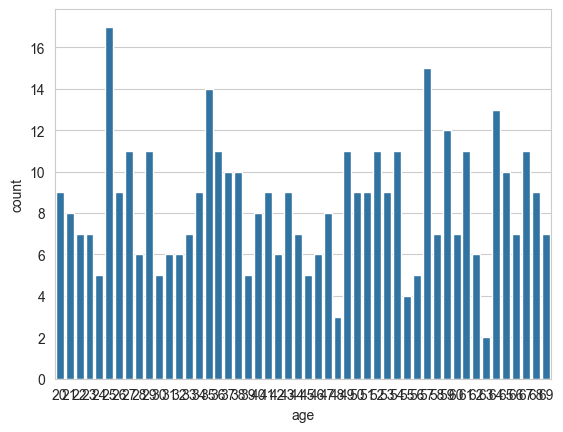

In [67]:
ax = sns.barplot(data=df_total.query('premium == True').age.value_counts().reset_index(), x = 'age', y='count')

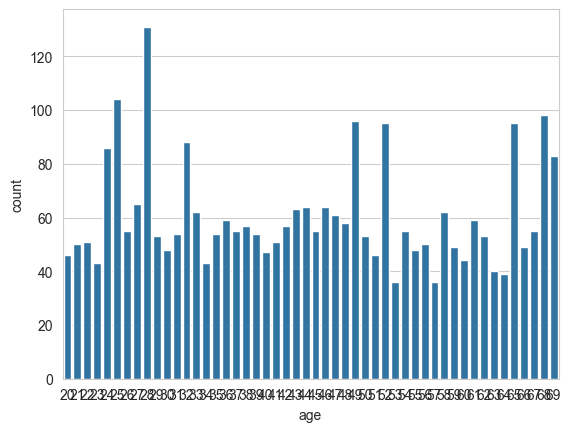

In [68]:
ax = sns.barplot(data=df_total.query('premium == False').age.value_counts().reset_index(), x = 'age', y='count')

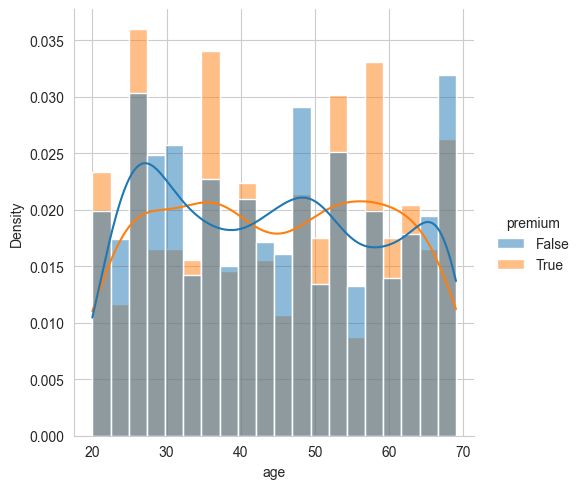

In [76]:
sns.displot(data=df_total, x='age', hue='premium', kde=True, kind='hist', stat='density', common_norm=False, bins=20)

In [ ]:
, kind='hist', stat='density', common_norm=False

In [76]:
df_comp = df_total.query('success == True').groupby('platform').

In [106]:
df_total.age

AttributeError: 'function' object has no attribute 'counts'

AttributeError: module 'matplotlib' has no attribute 'xlim'

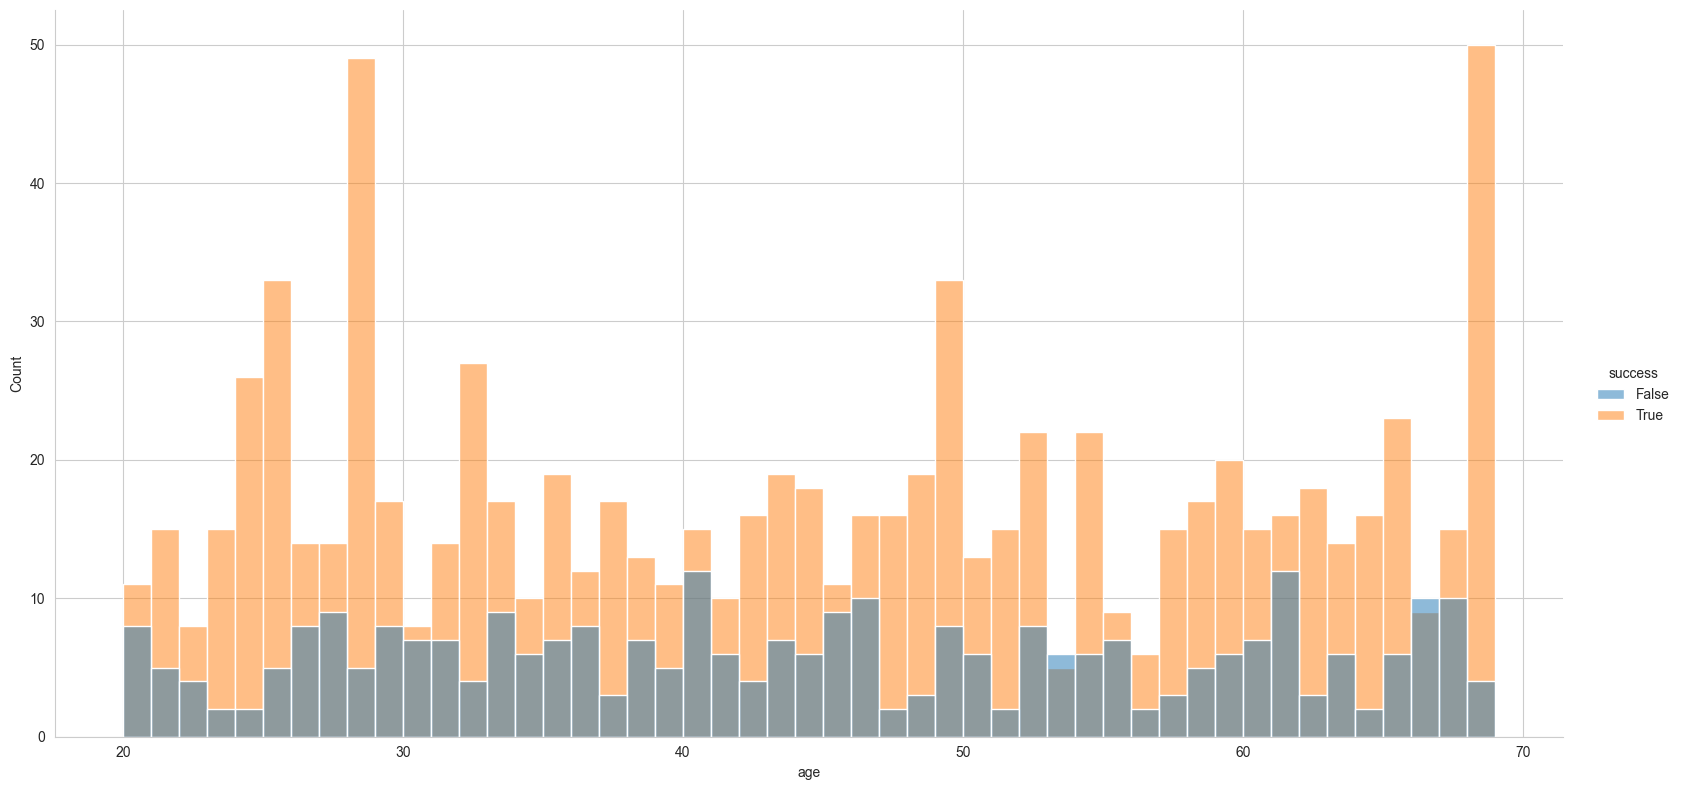

In [109]:
sns.displot(data=df_total.loc[(df_total.platform == 'computer')], x='age', hue ='success', height=8,aspect=2, bins =range(20,70))
